In [16]:
# !pip install scikit-fuzzy

In [17]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [18]:
kehadiran = ctrl.Antecedent(np.arange(0, 25, 1), 'kehadiran')
penjualan = ctrl.Antecedent(np.arange(0, 100, 1), 'penjualan')
bonus = ctrl.Consequent(np.arange(0, 15, 1), 'bonus')

c:\Users\Diavolo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


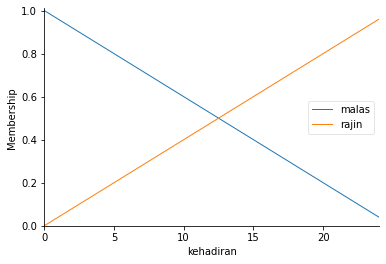

In [19]:
kehadiran['malas'] = fuzz.trapmf(kehadiran.universe, [0,0, 0, 25])
kehadiran['rajin'] = fuzz.trapmf(kehadiran.universe, [0,25, 30, 30])
kehadiran.view()

c:\Users\Diavolo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


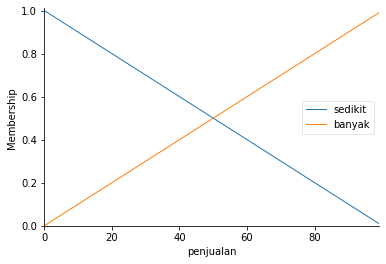

In [20]:
penjualan['sedikit'] = fuzz.trapmf(penjualan.universe, [0,0, 0, 100])
penjualan['banyak'] = fuzz.trapmf(penjualan.universe, [0,100, 110, 110])
penjualan.view()

c:\Users\Diavolo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


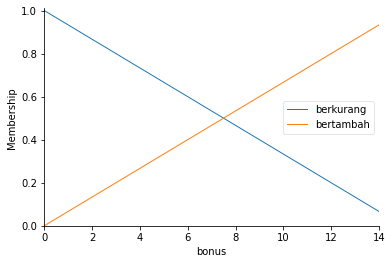

In [21]:
bonus['berkurang'] = fuzz.trapmf(bonus.universe, [0,0, 0, 15])
bonus['bertambah'] = fuzz.trapmf(bonus.universe, [0,15, 20, 20])
bonus.view()

In [22]:
rule1 = ctrl.Rule(kehadiran['malas'] & penjualan['banyak'], bonus['berkurang'])
rule2 = ctrl.Rule(kehadiran['malas'] & penjualan['sedikit'], bonus['berkurang'])
rule3 = ctrl.Rule(kehadiran['rajin'] & penjualan['banyak'], bonus['bertambah'])
rule4 = ctrl.Rule(kehadiran['rajin'] & penjualan['sedikit'], bonus['bertambah'])
bonus_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [23]:
prediksi = ctrl.ControlSystemSimulation(bonus_ctrl)

In [24]:
prediksi.input['kehadiran'] = 15
prediksi.input['penjualan'] = 40

In [25]:
print(prediksi.compute())
print("Bonus :",prediksi.output['bonus'],"%")

None
Bonus : 7.695652173913047 %


c:\Users\Diavolo\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


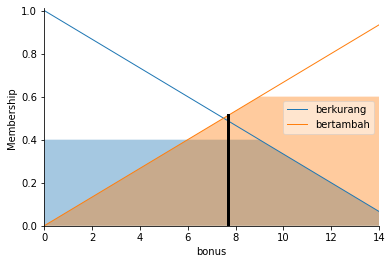

In [26]:
bonus.view(sim=prediksi)

In [27]:
bonus_agen=prediksi.output['bonus']
gaji_pokok_agen=2000000
print("gaji pokok agen :", gaji_pokok_agen)

gaji pokok agen : 2000000


In [28]:
bonus_total_agen = bonus_agen / 100 * gaji_pokok_agen
gaji_total_agen = bonus_total_agen + gaji_pokok_agen


In [29]:

print("gaji total agen :", gaji_total_agen)

gaji total agen : 2153913.0434782607
